In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-disorder-diagnosis-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/sleep-disorder-diagnosis-dataset/Sleep_health_and_lifestyle_dataset.csv')

pd.set_option('display.max_columns', None)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.columns = df.columns.str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep duration           374 non-null    float64
 5   quality of sleep         374 non-null    int64  
 6   physical activity level  374 non-null    int64  
 7   stress level             374 non-null    int64  
 8   bmi category             374 non-null    object 
 9   blood pressure           374 non-null    object 
 10  heart rate               374 non-null    int64  
 11  daily steps              374 non-null    int64  
 12  sleep disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df['sleep disorder'] = df['sleep disorder'].apply(lambda x: 'None' if pd.isna(x) else x)

df.head()

,person id,gender,age,occupation,sleep duration,quality of sleep,physical activity level,stress level,bmi category,blood pressure,heart rate,daily steps,sleep disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
from statsmodels.stats.stattools import jarque_bera, omni_normtest
from scipy.stats import skew, kurtosis


print("Skew: ",skew(df['heart rate']))
print("Kurtosis: ",kurtosis(df['heart rate'])+3)
print("Jarque-Bera: ",jarque_bera(df['heart rate']))
print("Omnibus: ",omni_normtest(df['heart rate']))

Skew:  1.219905670073163
Kurtosis:  5.240001297802327
Jarque-Bera:  (170.9536108722441, 7.549098088524997e-38, 1.219905670073163, 5.240001297802327)
Omnibus:  NormaltestResult(statistic=85.85263197778553, pvalue=2.276867917138795e-19)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


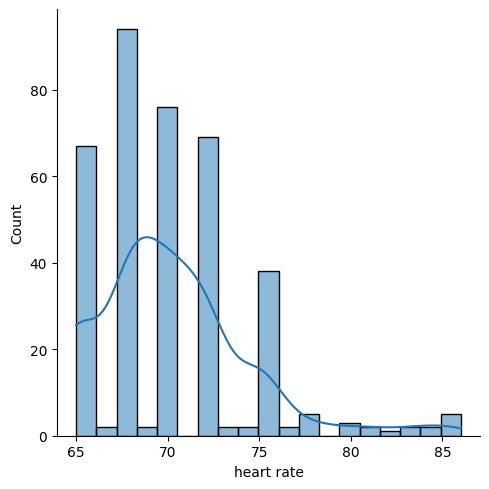

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['heart rate'], bins="fd", kde=True)

plt.show()

In [7]:
from scipy import stats

# This finds λ and transforms in one go
data_bc, lambda_bc = stats.boxcox(df['heart rate'])

print("Best λ from SciPy:", lambda_bc)

Best λ from SciPy: -5.521577841283215


In [8]:
print("Skew: ",skew(data_bc))
print("Kurtosis: ",kurtosis(data_bc))
print("Jarque-Bera: ",jarque_bera(data_bc))
print("Omnibus: ",omni_normtest(data_bc))

Skew:  0.03890615638370502
Kurtosis:  -0.4204429716549205
Jarque-Bera:  (2.8490548380689726, 0.24062214979104096, 0.03890615638370502, 2.5795570283450795)
Omnibus:  NormaltestResult(statistic=3.942285643159192, pvalue=0.13929757294386144)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


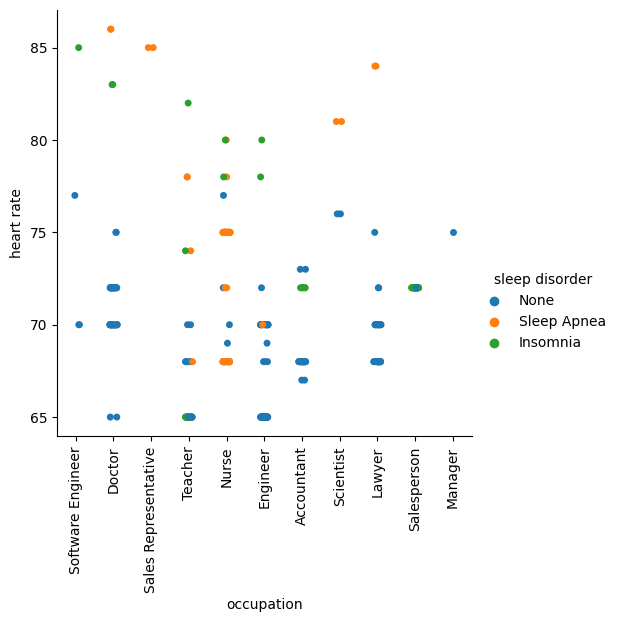

In [9]:
g = sns.catplot(data=df, x='occupation', y='heart rate', hue='sleep disorder', kind='strip')

g.set_xticklabels(rotation=90)

plt.show()

In [10]:
#df['occ_count'] = df.groupby('occupation')['heart rate'].transform('count')


df.groupby(by=['occupation', 'sleep disorder', 'heart rate']).agg(
    count=('heart rate', 'count'),
    #sub_percent=('occ_count', lambda x: len(x) / x.iloc[0]*100),
    percent=('heart rate', lambda x: len(x) / len(df)*100)
)

count   percent
occupation sleep disorder heart rate                 
Accountant Insomnia       68              1  0.267380
                          72              6  1.604278
           None           67              2  0.534759
                          68             26  6.951872
                          73              2  0.534759
...                                     ...       ...
Teacher    None           68              5  1.336898
                          70              2  0.534759
           Sleep Apnea    68              1  0.267380
                          74              1  0.267380
                          78              2  0.534759

[64 rows x 2 columns]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import shap

In [12]:
y = df['sleep disorder'].map({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1})

X = df.drop(['person id', 'sleep disorder'], axis=1)

cat_features = X.select_dtypes(include='object').columns

num_features = X.select_dtypes(include=['int64', 'float64']).columns

X.head()

,gender,age,occupation,sleep duration,quality of sleep,physical activity level,stress level,bmi category,blood pressure,heart rate,daily steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


In [13]:

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ('num', 'passthrough', num_features)
])


pipeline = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=0))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['gender', 'occupation', 'bmi category', 'blood pressure'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'sleep duration', 'quality of sleep', 'physical activity level',
       'stress level', 'heart rate', 'daily steps'],
      dtype='object'))])),
                ('clf', RandomForestClassifier(random_state=0))])

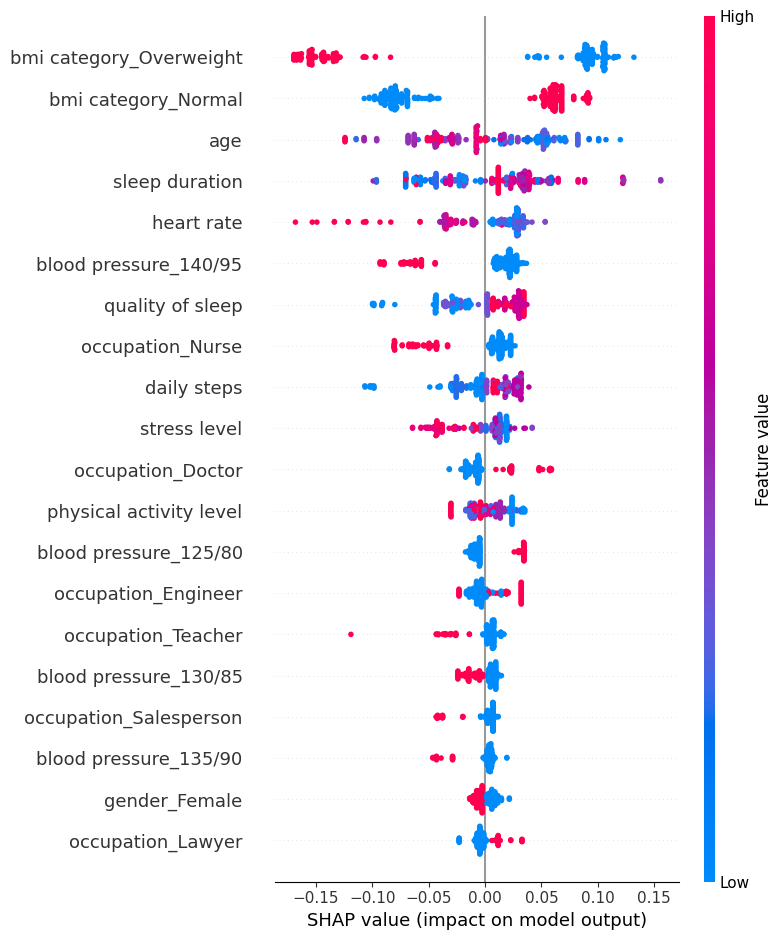

In [17]:
# Transform train data to dense matrix
X_train_trans = pipeline.named_steps["pre"].transform(X_train) 

# TreeExplainer for tree-based models
explainer = shap.TreeExplainer(pipeline["clf"])

# Compute SHAP values on dense input
shap_values = explainer.shap_values(X_train_trans)

# Plot summary
shap.summary_plot(shap_values[0], X_train_trans,
                  feature_names = (preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features).tolist() + num_features.tolist())
                 )

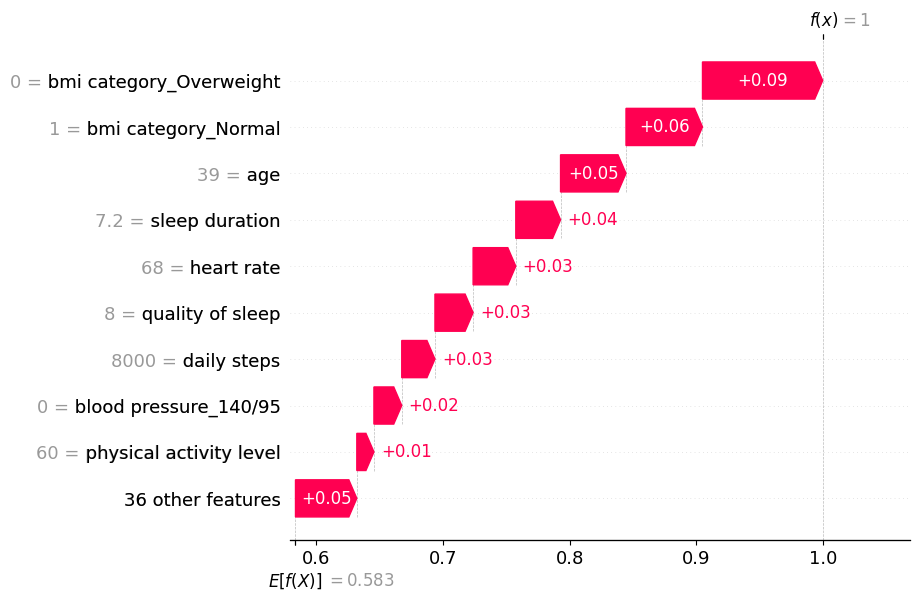

In [32]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0][0],         # first sample, class 0
        base_values=explainer.expected_value[0],
        data=X_train_trans[0],
        feature_names = (preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features).tolist() + num_features.tolist())
    ))